<a href="https://colab.research.google.com/github/HernandoDafa/customer-engagement-model/blob/feature%2Fdeploy/MPML_HERNANDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('/content/onlinefoods.csv')

In [19]:
# Menampilkan informasi dasar tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [20]:
# Menampilkan statistik deskriptif untuk fitur numerik
print(df.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


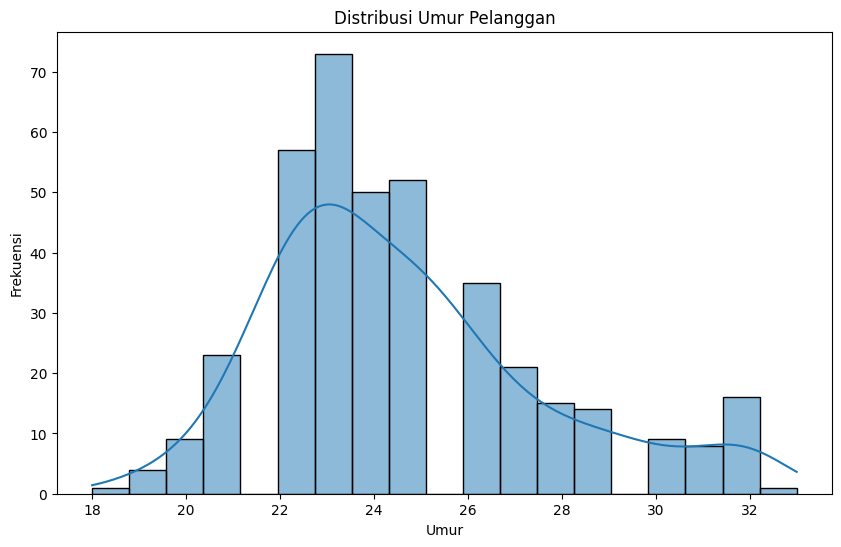

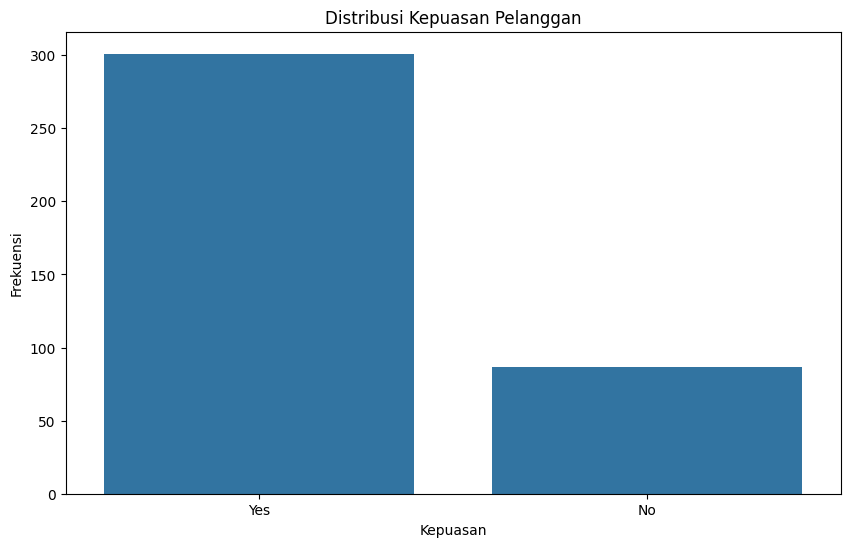

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribusi umur pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi kepuasan pelanggan
plt.figure(figsize=(10, 6))
sns.countplot(x='Output', data=df)  # Menggunakan 'Output' bukan 'satisfaction'
plt.title('Distribusi Kepuasan Pelanggan')
plt.xlabel('Kepuasan')
plt.ylabel('Frekuensi')
plt.show()

In [22]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

In [23]:
# Mendefinisikan fitur dan target
X = df.drop('Output', axis=1)  # Menggunakan 'Output' bukan 'satisfaction'
y = df['Output']

In [24]:
# Mengidentifikasi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle
# One-hot encoding untuk kolom kategorikal
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_categorical.columns = encoder.get_feature_names_out(categorical_cols)
encoded_categorical.index = X.index

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
# Menggabungkan kembali data setelah encoding
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_categorical], axis=1)

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Standard scaling untuk fitur numerik
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [28]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan beberapa baris dari data pelatihan dan pengujian untuk memastikan hasilnya
print("Data Pelatihan (Fitur):")
print(X_train.head())

print("\nData Pelatihan (Target):")
print(y_train.head())

print("\nData Pengujian (Fitur):")
print(X_test.head())

print("\nData Pengujian (Target):")
print(y_test.head())

Data Pelatihan (Fitur):
          Age  Family size  latitude  longitude  Pin code  Gender_Male  \
63  -0.548116     0.532929 -0.849795   0.082680 -0.354391          1.0   
238  0.797890    -0.949340 -1.970612   0.067082  1.144375          1.0   
132 -0.548116    -0.949340  0.671635  -0.562699 -1.183496          1.0   
101 -0.548116    -0.949340 -0.626982   0.145073 -0.322503          1.0   
351  0.124887    -0.949340  0.140485   0.792402 -0.067394          1.0   

     Marital Status_Prefer not to say  Marital Status_Single  \
63                                0.0                    1.0   
238                               0.0                    0.0   
132                               0.0                    1.0   
101                               0.0                    1.0   
351                               0.0                    1.0   

     Occupation_House wife  Occupation_Self Employeed  ...  \
63                     0.0                        0.0  ...   
238                   

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Fungsi untuk mengevaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi {model_name}:")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Presisi:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1-Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

Evaluasi Logistic Regression:
Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[12  0]
 [ 0 66]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        12
         Yes       1.00      1.00      1.00        66

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [30]:
# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
evaluate_model(y_test, y_pred_dec_tree, "Decision Tree")

# Fungsi untuk mengevaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi {model_name}:")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Presisi:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1-Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

Evaluasi Decision Tree:
Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[12  0]
 [ 0 66]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        12
         Yes       1.00      1.00      1.00        66

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [31]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# Fungsi untuk mengevaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi {model_name}:")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Presisi:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1-Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

Evaluasi K-Nearest Neighbors:
Akurasi: 0.9358974358974359
Presisi: 0.9154589371980676
Recall: 0.8257575757575757
F1-Score: 0.8624338624338626
Confusion Matrix:
 [[ 8  4]
 [ 1 65]]
Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.67      0.76        12
         Yes       0.94      0.98      0.96        66

    accuracy                           0.94        78
   macro avg       0.92      0.83      0.86        78
weighted avg       0.93      0.94      0.93        78



In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Hyperparameter Tuning for Logistic Regression
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)

# Hyperparameter Tuning for Decision Tree
param_grid_dec_tree = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dec_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_dec_tree, cv=5)
grid_dec_tree.fit(X_train, y_train)
best_dec_tree = grid_dec_tree.best_estimator_
print("Best parameters for Decision Tree:", grid_dec_tree.best_params_)

# Hyperparameter Tuning for K-Nearest Neighbors
param_grid_knn = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best parameters for K-Nearest Neighbors:", grid_knn.best_params_)

Best parameters for Logistic Regression: {'C': 1}
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}


In [33]:
# Cross-Validation for Logistic Regression
cv_log_reg = cross_val_score(best_log_reg, X_train, y_train, cv=5)
print("Cross-Validation Scores for Logistic Regression:", cv_log_reg)
print("Mean Cross-Validation Score for Logistic Regression:", cv_log_reg.mean())

# Cross-Validation for Decision Tree
cv_dec_tree = cross_val_score(best_dec_tree, X_train, y_train, cv=5)
print("Cross-Validation Scores for Decision Tree:", cv_dec_tree)
print("Mean Cross-Validation Score for Decision Tree:", cv_dec_tree.mean())

# Cross-Validation for K-Nearest Neighbors
cv_knn = cross_val_score(best_knn, X_train, y_train, cv=5)
print("Cross-Validation Scores for K-Nearest Neighbors:", cv_knn)
print("Mean Cross-Validation Score for K-Nearest Neighbors:", cv_knn.mean())

Cross-Validation Scores for Logistic Regression: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score for Logistic Regression: 1.0
Cross-Validation Scores for Decision Tree: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score for Decision Tree: 1.0
Cross-Validation Scores for K-Nearest Neighbors: [0.91935484 0.93548387 0.9516129  0.93548387 0.91935484]
Mean Cross-Validation Score for K-Nearest Neighbors: 0.932258064516129


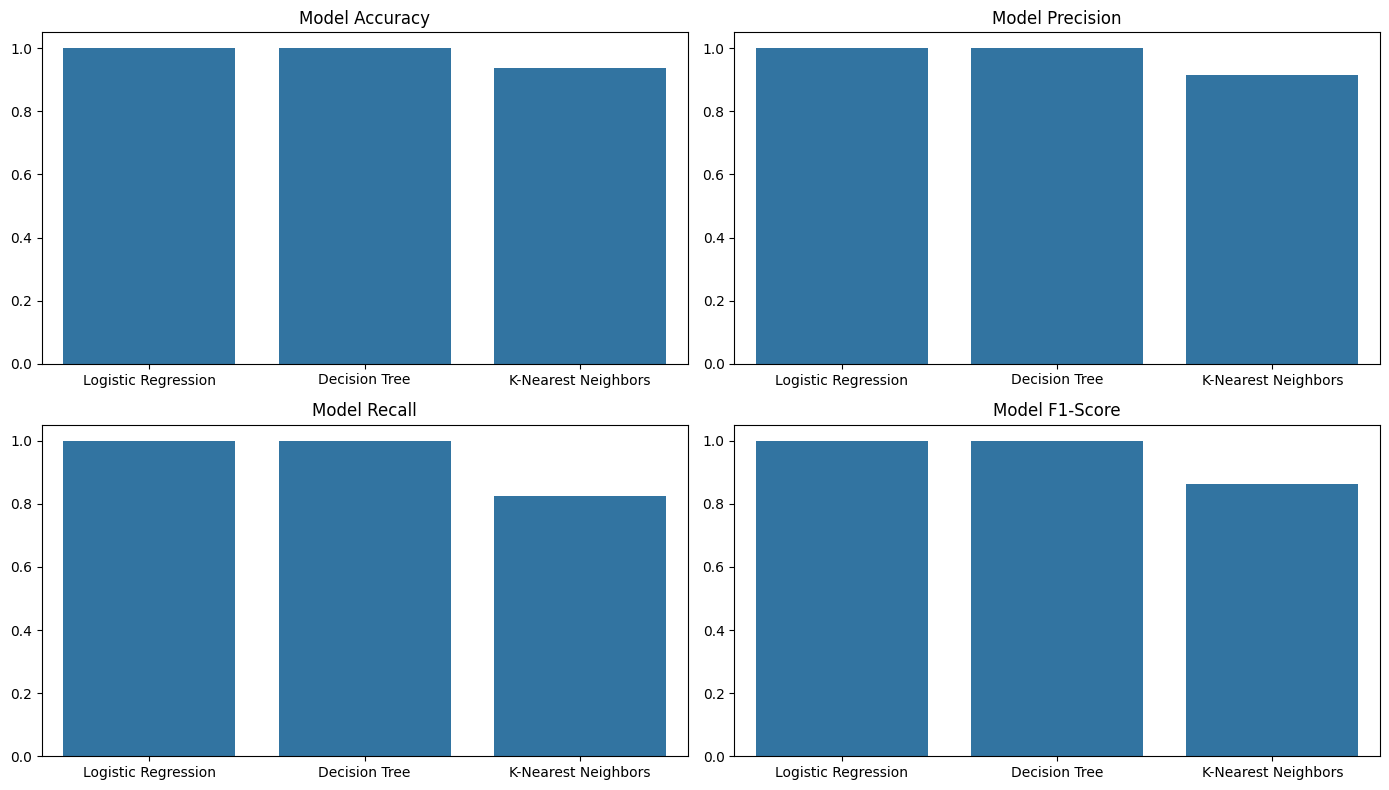

In [34]:
# Visualizing Model Performance
models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_dec_tree), accuracy_score(y_test, y_pred_knn)]
precisions = [precision_score(y_test, y_pred_log_reg, average='macro'), precision_score(y_test, y_pred_dec_tree, average='macro'), precision_score(y_test, y_pred_knn, average='macro')]
recalls = [recall_score(y_test, y_pred_log_reg, average='macro'), recall_score(y_test, y_pred_dec_tree, average='macro'), recall_score(y_test, y_pred_knn, average='macro')]
f1_scores = [f1_score(y_test, y_pred_log_reg, average='macro'), f1_score(y_test, y_pred_dec_tree, average='macro'), f1_score(y_test, y_pred_knn, average='macro')]

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy')

plt.subplot(2, 2, 2)
sns.barplot(x=models, y=precisions)
plt.title('Model Precision')

plt.subplot(2, 2, 3)
sns.barplot(x=models, y=recalls)
plt.title('Model Recall')

plt.subplot(2, 2, 4)
sns.barplot(x=models, y=f1_scores)
plt.title('Model F1-Score')

plt.tight_layout()
plt.show()

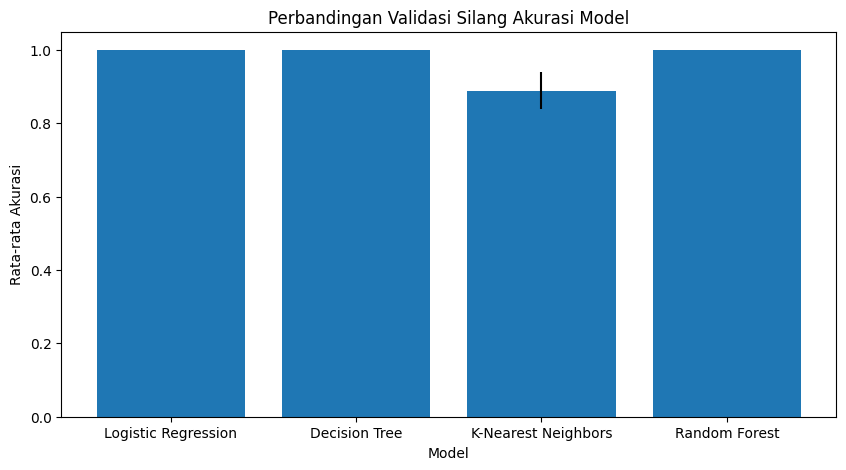

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score

# Pelatihan model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Inisialisasi variabel untuk menyimpan hasil validasi silang
cv_means = []
cv_stds = []
model_names = []

# Pelatihan dan validasi silang untuk Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_means.append(cv_scores_log_reg.mean())
cv_stds.append(cv_scores_log_reg.std())
model_names.append("Logistic Regression")

# Pelatihan dan validasi silang untuk Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
cv_scores_dec_tree = cross_val_score(dec_tree, X, y, cv=5, scoring='accuracy')
cv_means.append(cv_scores_dec_tree.mean())
cv_stds.append(cv_scores_dec_tree.std())
model_names.append("Decision Tree")

# Pelatihan dan validasi silang untuk K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
cv_scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
cv_means.append(cv_scores_knn.mean())
cv_stds.append(cv_scores_knn.std())
model_names.append("K-Nearest Neighbors")

# Pelatihan dan validasi silang untuk Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_means.append(cv_scores_rf.mean())
cv_stds.append(cv_scores_rf.std())
model_names.append("Random Forest")

# Visualisasi Hasil Validasi Silang
plt.figure(figsize=(10, 5))
plt.bar(model_names, cv_means, yerr=cv_stds)
plt.title('Perbandingan Validasi Silang Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Rata-rata Akurasi')
plt.show()